In [5]:
import pandas as pd
from dotenv import load_dotenv
import os
import numpy as np

load_dotenv()

pd.options.display.float_format = '{:.2f}'.format # For 2 decimal places


file_path = f'.{os.getenv('CLEANED_OUTPUT_PATH')}/cleanedLoans.csv'

df = pd.read_csv(file_path)

# result of cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57020 entries, 0 to 57019
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UID                       57020 non-null  object 
 1   Is_Linked                 57020 non-null  object 
 2   Is_Enabled                57020 non-null  object 
 3   Interest_Rate             57020 non-null  float64
 4   Minimum_Payment           57020 non-null  float64
 5   Current_Loan_Balance      57020 non-null  float64
 6   Original_Loan_Balance     57020 non-null  float64
 7   Loan_Provider             57020 non-null  object 
 8   Date_Issued               57020 non-null  object 
 9   Loan_Term                 57020 non-null  int64  
 10  Date_Linked               57020 non-null  object 
 11  Loan_Last_Payment         9031 non-null   object 
 12  Is_Primary_Loan           57020 non-null  object 
 13  Loan_Type                 57020 non-null  object 
 14  Unique

In [2]:
df['Loan_Term'] = df['Loan_Term'].replace(0, np.nan)


numerical_summary = df.describe()
categorical_summary = df.select_dtypes(include=['object']).nunique()

print('Summary statistics for numerical columns ')
print(f'\n{numerical_summary}\n\n\n')
print('Count of unique values in categorical columns')
print(f'\n{categorical_summary}\n\n\n')


Summary statistics for numerical columns 

       Interest_Rate  Minimum_Payment  Current_Loan_Balance  \
count       57269.00         57269.00              57269.00   
mean            0.19           230.43              15796.07   
std             0.11           566.94              57173.99   
min             0.00             0.00                  0.00   
25%             0.07            30.00                790.00   
50%             0.24            71.00               2837.00   
75%             0.25           233.00               8330.00   
max             0.50         74907.00            2057648.00   

       Original_Loan_Balance  Loan_Term  Unique_Saved_In_Interest  
count               57269.00   20699.00                  57269.00  
mean                20224.37     152.05                   1096.39  
std                 90352.01     109.11                   9652.05  
min                     0.00       1.00                      0.00  
25%                  1844.00      62.00          

In [3]:
df.value_counts('Loan_Type')

Loan_Type
Credit Cards      34330
Student Loans     11165
Auto Loans         4707
Personal Loans     4599
Mortgages          2468
Name: count, dtype: int64

## Key Findings from Preliminary Analysis:
### Numerical Insights:
- Loan Balances: The average current loan balance is around $15,796.07, with a maximum current loan balance of over $2M.
- Minimum Payments: The average minimum payment is $230.43.
- Loan Terms: Average loan term is 152.05 months excluding revolving debts (credit cards).

### Categorical Insights:
- There are 8019 unique users, indicating some users hold multiple loans.
- Over 3000 different loan providers exist, showing a diverse loan landscape.
- 5 main loan types exist, credit cards, student loans, auto loans personal loans, and mortgages.

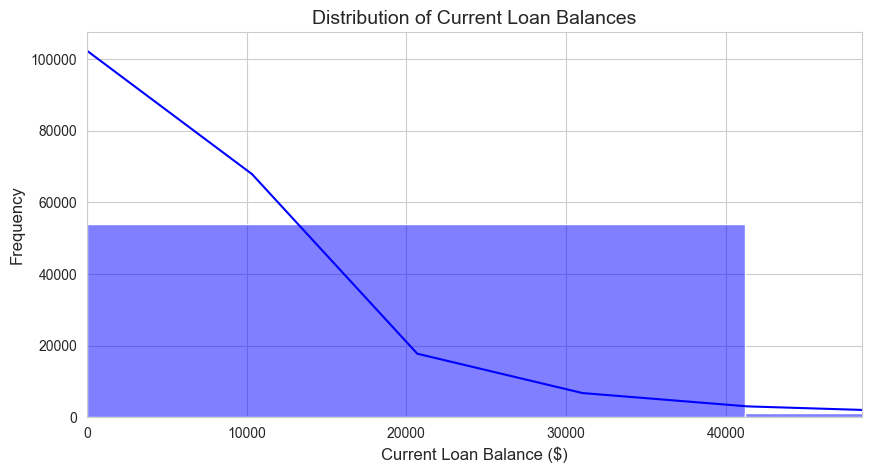

/var/folders/81/20kbk80x15n467ykj_mqdq0h0000gn/T/ipykernel_86951/1931292177.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Loan_Type"], order=df["Loan_Type"].value_counts().index, palette="Oranges")


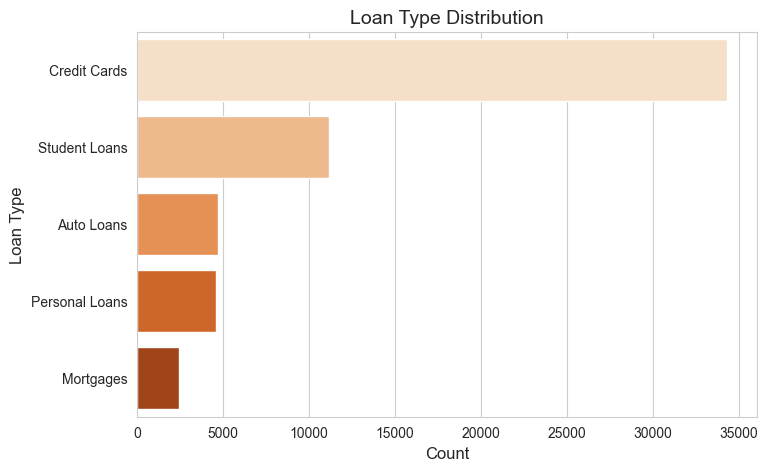

/var/folders/81/20kbk80x15n467ykj_mqdq0h0000gn/T/ipykernel_86951/1931292177.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Loan_Type", x="Current_Loan_Balance", data=loan_volume, order=loan_volume.sort_values("Current_Loan_Balance", ascending=False)["Loan_Type"], palette="Blues")


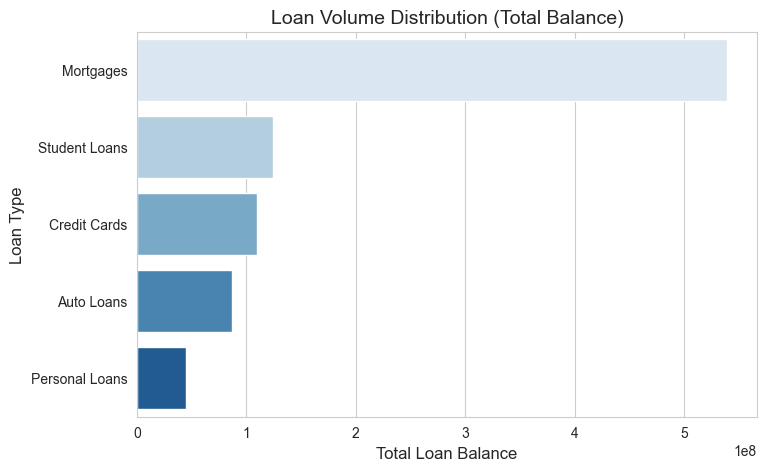

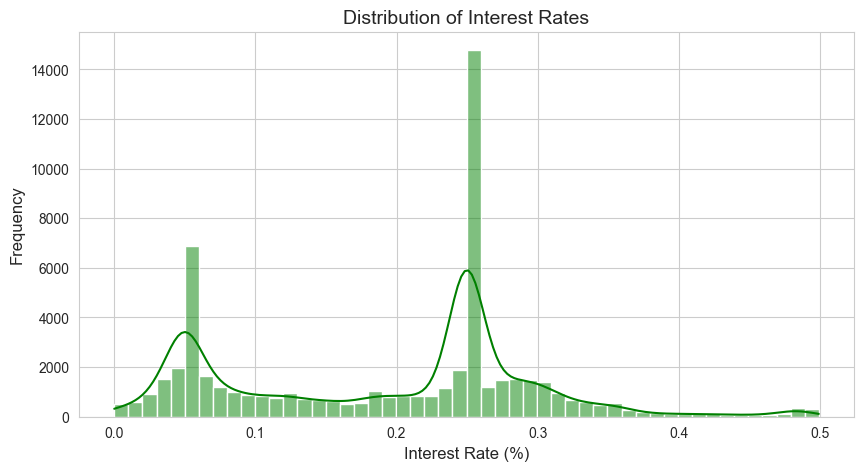

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Distribution of Current Loan Balance
plt.figure(figsize=(10, 5))
sns.histplot(df["Current_Loan_Balance"], bins=50, kde=True, color="blue")
plt.xlim(0, df["Current_Loan_Balance"].quantile(0.95))  # Trim extreme values for better visualization
plt.title("Distribution of Current Loan Balances", fontsize=14)
plt.xlabel("Current Loan Balance ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Loan Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y=df["Loan_Type"], order=df["Loan_Type"].value_counts().index, palette="Oranges")
plt.title("Loan Type Distribution", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Loan Type", fontsize=12)
plt.show()

# Loan Volume Distribution
plt.figure(figsize=(8, 5))
loan_volume = df.groupby("Loan_Type")["Current_Loan_Balance"].sum().reset_index()
sns.barplot(y="Loan_Type", x="Current_Loan_Balance", data=loan_volume, order=loan_volume.sort_values("Current_Loan_Balance", ascending=False)["Loan_Type"], palette="Blues")
plt.title("Loan Volume Distribution (Total Balance)", fontsize=14)
plt.xlabel("Total Loan Balance", fontsize=12)
plt.ylabel("Loan Type", fontsize=12)
plt.show()


# Interest Rate Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Interest_Rate"], bins=50, kde=True, color="green")
plt.title("Distribution of Interest Rates", fontsize=14)
plt.xlabel("Interest Rate (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


## Visual Insights:
### Current Loan Balances:
- Most loans are below $50,000, high volume from $1,000 - $10,000 because of credit cards, but some outliers exceed $500K–$2M, possibly mortgages or high-limit loans.
### Loan Type Distribution:
- The dataset consists mostly of Credit Cards, followed by Student Loans, Auto Loans, Personal Loans, and Mortgages.
### Interest Rates:
- Most loans have interest rates between 20 - 30% due to the number of credit cards, but there are noticeable spikes around 5-10% (common for auto/mortgages).


---
# Trend/Time Series


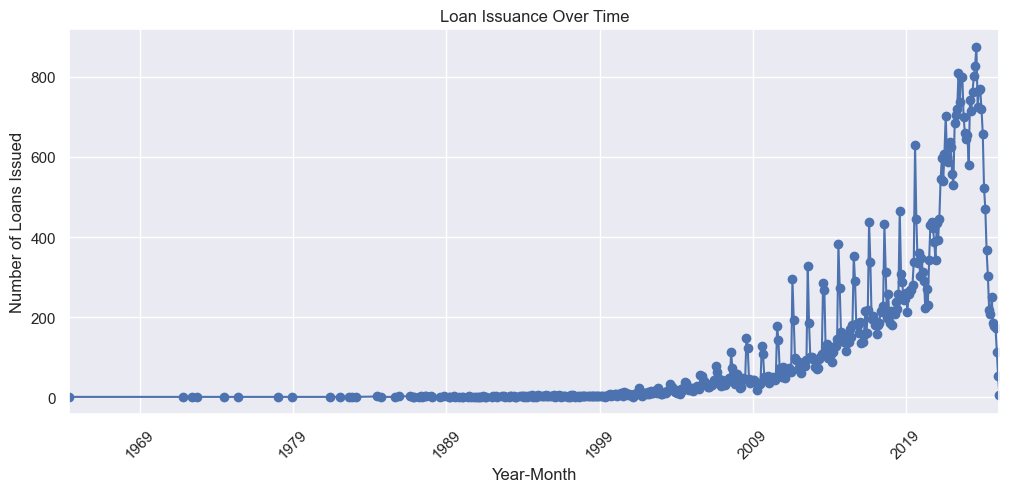

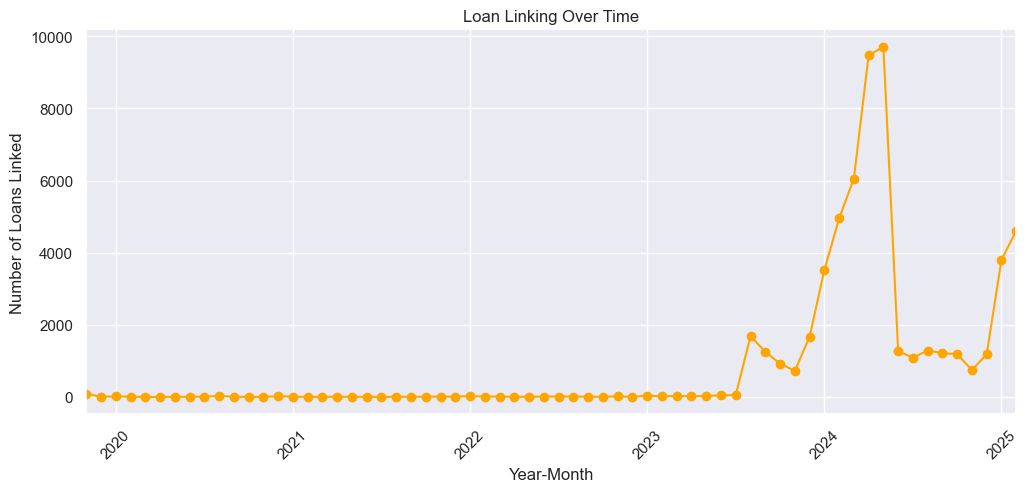

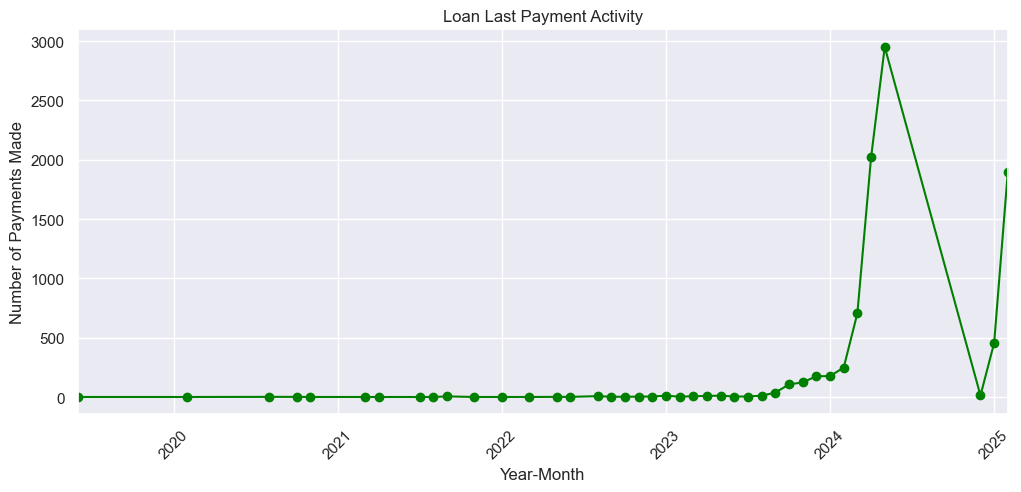

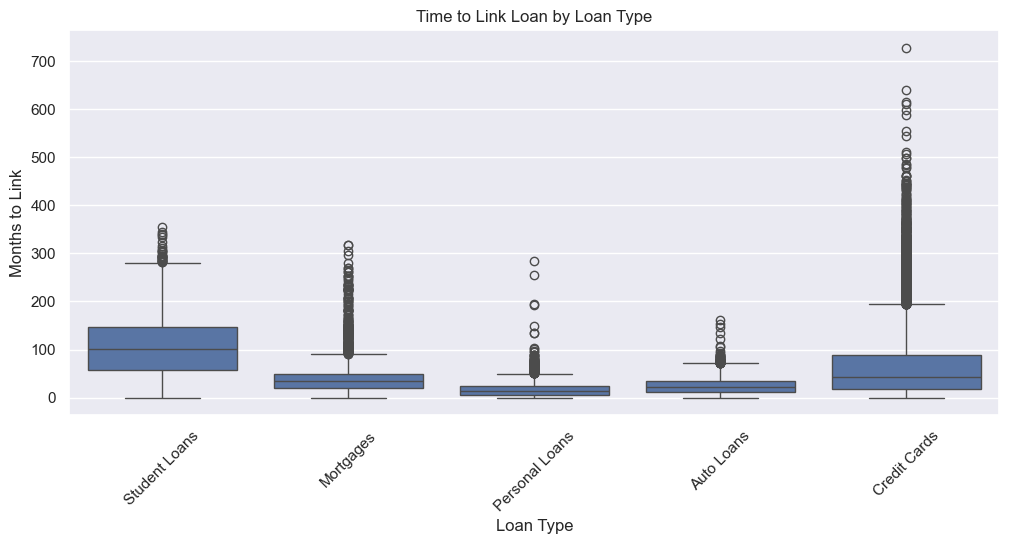

In [6]:
# Set plot style
sns.set_theme(style="darkgrid")

date_cols = ['Date_Issued', 'Date_Linked', 'Loan_Last_Payment']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Loan Issuance Over Time
df['YearMonth_Issued'] = df['Date_Issued'].dt.to_period('M')
issued_trend = df.groupby('YearMonth_Issued').size()

plt.figure(figsize=(12,5))
issued_trend.plot(kind='line', marker='o', title='Loan Issuance Over Time')
plt.xlabel("Year-Month")
plt.ylabel("Number of Loans Issued")
plt.xticks(rotation=45)
plt.show()

# Loan Linking Over Time
df['YearMonth_Linked'] = df['Date_Linked'].dt.to_period('M')
linked_trend = df.groupby('YearMonth_Linked').size()

plt.figure(figsize=(12,5))
linked_trend.plot(kind='line', marker='o', color='orange', title='Loan Linking Over Time')
plt.xlabel("Year-Month")
plt.ylabel("Number of Loans Linked")
plt.xticks(rotation=45)
plt.show()

# Last Payment Activity Over Time
df['YearMonth_Payment'] = df['Loan_Last_Payment'].dt.to_period('M')
payment_trend = df.groupby('YearMonth_Payment').size()

plt.figure(figsize=(12,5))
payment_trend.plot(kind='line', marker='o', color='green', title='Loan Last Payment Activity')
plt.xlabel("Year-Month")
plt.ylabel("Number of Payments Made")
plt.xticks(rotation=45)
plt.show()



# Time taken to link a loan after issuance
df['Months_To_Link'] = (df['Date_Linked'] - df['Date_Issued']).dt.days / 30.44 # average days in a month

# Boxplot to check variations by loan type
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Loan_Type', y='Months_To_Link')
plt.xticks(rotation=45)
plt.title("Time to Link Loan by Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Months to Link")
plt.show()
